In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 
teste1  = pd.read_csv('testing.csv')
treino1  = pd.read_csv('training.csv')
preditores = pd.read_csv('reducedSet.csv')
variaveis  = np.array(preditores['x'])
treino = treino1[variaveis]
teste =  teste1[variaveis]
treino.insert(0,'Class' , treino1['Class'] )
teste.insert(0,'Class'  , teste1['Class']  )

# Questão 01

1-Use os preditores no conjunto de treinamento para aprender um modelo de classificação linear e testar o modelo usando o conjunto de teste. Para a tarefa, você deve selecionar uma classificação logística ou um método de análise discriminante linear. Quantos preditores você usaria para modelar o modelo? Depois de treinar o modelo, calcule a matriz de confusão e a fração geral das previsões corretas. Explique o que a matriz de confusão está dizendo a você sobre os tipos de classificações erradas feitas pelo método.

In [ ]:
X_train = treino.drop('Class',axis=1)
y_train = treino['Class']
X_test  = teste.drop('Class',axis=1)
y_test  = teste['Class']
 

In [ ]:
desempenhos = []

In [ ]:
data = pd.DataFrame({'Class': ['unsuccessful', 'successful']})
X_train.head()

,NumCI,NumDR,NumECI,NumPS,NumSCI,NumSR,NumUNK,CI.1940,CI.1945,CI.1950,CI.1955,DR.1955,PS.1955,CI.1960,PS.1960,CI.1965,PS.1965,CI.1970,CI.1975,CI.1980,CI.AsiaPacific,CI.Australia,DR.Australia,PS.Australia,CI.EasternEurope,CI.GreatBritain,CI.MiddleEastandAfrica,CI.NewZealand,CI.NorthAmerica,CI.SouthAfrica,CI.TheAmericas,CI.WesternEurope,CI.English,DR.English,PS.English,CI.OtherLang,CI.PhD,DR.PhD,PS.PhD,Success.CI,...,Sponsor6B,Sponsor75C,Sponsor97A,ContractValueBandA,ContractValueBandB,ContractValueBandC,ContractValueBandD,ContractValueBandE,ContractValueBandF,ContractValueBandG,ContractValueBandH,ContractValueBandUnk,GrantCat10A,GrantCat10B,GrantCat20A,GrantCat20C,GrantCat30B,GrantCat30C,GrantCat30D,GrantCat30G,GrantCat50A,GrantCatUnk,Apr,Aug,Dec,Feb,Jan,Jul,Jun,May,Nov,Oct,Sep,Fri,Mon,Sat,Thurs,Tues,Wed,Day
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,8
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11
2,3,1,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,14
3,1,0,3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,15
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,16


In [ ]:
# TALVEZ APAGAR #
data = { 
  'Class': y_train,
}
dF_y_train = pd.DataFrame(data, columns= ['Class'])
dF_y_train

,Class
0,successful
1,successful
2,successful
3,successful
4,unsuccessful
...,...
8185,unsuccessful
8186,unsuccessful
8187,successful
8188,successful


In [ ]:
data = { 
  'Class': y_test,
}
dF_y_test = pd.DataFrame(data, columns= ['Class'])
dF_y_test

,Class
0,unsuccessful
1,unsuccessful
2,successful
3,successful
4,successful
...,...
513,unsuccessful
514,successful
515,successful
516,unsuccessful


In [ ]:
dF_y_train['Class'].replace({'unsuccessful':0, 'successful':1}, inplace=True)
dF_y_test['Class'].replace({'unsuccessful':0, 'successful':1}, inplace=True)

In [ ]:
dF_y_test

,Class
0,0
1,0
2,1
3,1
4,1
...,...
513,0
514,1
515,1
516,0


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 

#Discriminante linear
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, dF_y_train['Class'].ravel())
y_pred_lda = lda.predict(np.array(X_test))

#Porcentagem de Classificação correta
desempenhos.append(100*lda.score(X_test, dF_y_test))
100*lda.score(X_test, dF_y_test)

84.94208494208493

In [ ]:
log_confusion_matrix = confusion_matrix(dF_y_test, y_pred_lda)
log_confusion_matrix 

array([[284,  45],
       [ 33, 156]])

O primeiro elemento é o não-sucedido, 

,Class,NumCI,NumDR,NumECI,NumPS,NumSCI,NumSR,NumUNK,CI.1940,CI.1945,CI.1950,CI.1955,DR.1955,PS.1955,CI.1960,PS.1960,CI.1965,PS.1965,CI.1970,CI.1975,CI.1980,CI.AsiaPacific,CI.Australia,DR.Australia,PS.Australia,CI.EasternEurope,CI.GreatBritain,CI.MiddleEastandAfrica,CI.NewZealand,CI.NorthAmerica,CI.SouthAfrica,CI.TheAmericas,CI.WesternEurope,CI.English,DR.English,PS.English,CI.OtherLang,CI.PhD,DR.PhD,PS.PhD,...,Sponsor62B,Sponsor6B,Sponsor75C,Sponsor97A,ContractValueBandA,ContractValueBandB,ContractValueBandC,ContractValueBandD,ContractValueBandE,ContractValueBandF,ContractValueBandG,ContractValueBandH,ContractValueBandUnk,GrantCat10A,GrantCat10B,GrantCat20A,GrantCat20C,GrantCat30B,GrantCat30C,GrantCat30D,GrantCat30G,GrantCat50A,GrantCatUnk,Apr,Aug,Dec,Feb,Jan,Jul,Jun,May,Nov,Oct,Sep,Fri,Mon,Sat,Thurs,Tues,Wed
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,3,1,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,1,0,3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8186,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8187,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8188,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


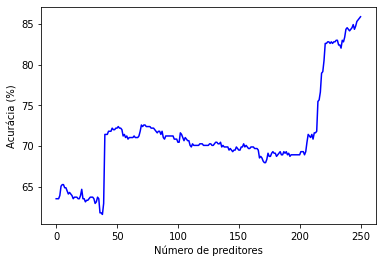

In [ ]:
def logi(dados1, dados2):
    X_train = dados1.drop('Class',axis=1)
    y_train = dados1['Class']
    X_test = dados2.drop('Class',axis=1)
    y_test = dados2['Class']
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, dF_y_train['Class'].ravel())
    y_pred_lda = lda.predict(np.array(X_test))
    #Porcetagem de Classificação correta
    return 100*lda.score(X_test, y_test)

frame =[]
acc = []
dados_l = pd.concat([dF_y_train['Class']], axis=1, keys=['Class'])
dados_l2 = pd.concat([dF_y_test['Class']], axis=1, keys=['Class'])

for i in range(0,251):
    dados_l.insert(i+1, preditores['x'][i], treino[preditores['x'][i]])
    dados_l2.insert(i+1, preditores['x'][i], teste[preditores['x'][i]])
    acc.append(logi(dados_l, dados_l2))

plt.plot(np.array(acc),color='b')

plt.ylabel('Acurácia (%)')
#plt.xticks([0,1,2,3,4,5,6,7],frame,rotation=90)
plt.xlabel('Número de preditores')
dados_l

In [ ]:
print('Acurácia com 252 preditores:', acc[-1])

Acurácia com 252 preditores: 85.9073359073359


A partir da análise do gráfico acima, podemos concluir que o nível de acurária é aumentado conforme se aumenta o número de preditores, dessa forma, torna-se necessária a utilização dos 252 preditores para se obter o melhor resultado possível, com a acurácia chegando a 85.91%.

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(dF_y_test, y_pred_lda)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.8443093549476528

In [ ]:
def plot_roc(roc_auc):
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylabel('Taxa de positivos')
    plt.xlabel('Taxa de falsos positivos')

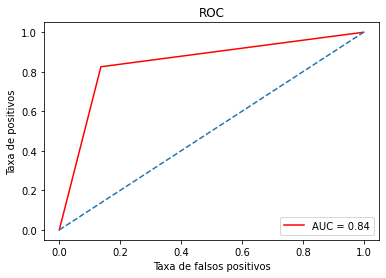

In [ ]:
plot_roc(roc_auc)

# Questão 02

2- Use os preditores no conjunto de treinamento para aprender um modelo de classificação não linear e testar o modelo usando o conjunto de teste. Para a tarefa, você deve selecionar pelo menos um método entre os seguintes: análise discriminante quadrática, redes neurais, k-vizinhos mais próximos e máquinas de vetores de suporte. Dependendo da seleção do método, ajuste o modelo de maneira conveniente (se necessário, use validação cruzada). Depois de treinar o modelo, calcule a matriz de confusão e a fração geral das previsões corretas.Explique o que a matriz de confusão está dizendo sobre os tipos de classificações erradas feitas pelo método.

Método KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16)
X_train = treino.drop('Class',axis=1)
y_train = dF_y_train['Class']
X_test  = teste.drop('Class',axis=1)
y_test  = dF_y_test['Class']

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [ ]:
y_train

0       1
1       1
2       1
3       1
4       0
       ..
8185    0
8186    0
8187    1
8188    1
8189    1
Name: Class, Length: 8190, dtype: int64

In [ ]:
resultado = knn.predict(X_test)

In [ ]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        274   55  329
1         89  100  189
All      363  155  518


In [ ]:
100*knn.score(X_test, dF_y_test)

72.2007722007722

In [ ]:
kdoknn = []
desempenhodoknn = []
def scorek(N):
  knn = KNeighborsClassifier(n_neighbors=N)
  X_train = treino.drop('Class',axis=1)
  y_train = dF_y_train['Class']
  X_test  = teste.drop('Class',axis=1)
  y_test  = dF_y_test['Class']
  knn.fit(X_train, y_train)
  return 100*knn.score(X_test, dF_y_test)
for i in range(1,60):
  desempenhodoknn.append(scorek(i))
  kdoknn.append(i)

In [ ]:
desempenhodoknn.index(max(desempenhodoknn))
kdoknn[desempenhodoknn.index(max(desempenhodoknn))]

16

In [ ]:
max(desempenhodoknn)

72.2007722007722

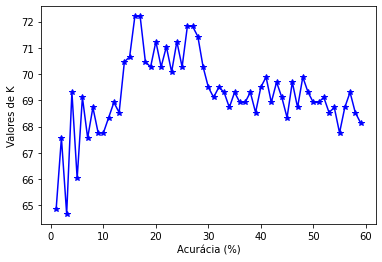

In [ ]:
plt.plot(kdoknn,desempenhodoknn,color='b',linestyle='-',marker='*')
plt.xlabel('Acurácia (%)')
plt.ylabel('Valores de K')
desempenhos.append(max(desempenhodoknn))

In [ ]:
X = treino.drop('Class',axis=1)
X = np.array(X)[:,[0,251]]
y = dF_y_train['Class']


In [ ]:
from mlxtend.plotting import plot_decision_regions
def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize=(8,5))
    plot_decision_regions(X,y,clf=knn,legend=2)
    plt.xlabel(variaveis[0])
    plt.ylabel(variaveis[1])
    plt.title('Fronteiras de Complexidade - KNN')

In [ ]:
y = np.array(y)
y

array([1, 1, 1, ..., 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


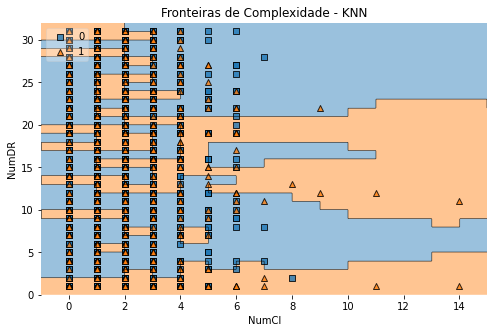

In [ ]:
plot_fronteiras(kdoknn[desempenhodoknn.index(max(desempenhodoknn))])

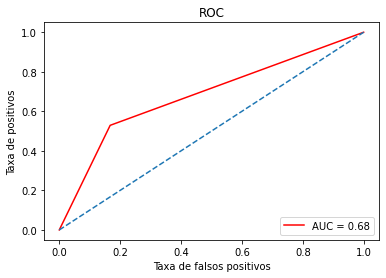

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(dF_y_test, resultado)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
plot_roc(roc_auc)

QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())
y_pred_qda =  qda.predict(np.array(X_test))

In [ ]:
desempenhos.append(100*qda.score(X_test, y_test))
100*qda.score(X_test, y_test)

74.5173745173745

In [ ]:
log_confusion_matrix = confusion_matrix(dF_y_test, y_pred_qda)
log_confusion_matrix

array([[264,  65],
       [ 67, 122]])


A matriz de confusão indica a quantidade de elementos classificados como negativo, positivo, falso positivo e falso negativo. A partir da análise, podemos concluir que é indicado a quantidade de alunos que deveriam receber a bolsa e não recebem (65) e a quantidade que recebe e não deveriam receber (67).

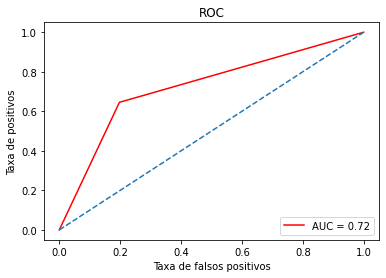

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(dF_y_test, y_pred_qda)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
plot_roc(roc_auc)

#Questão 3

Compare os resultados obtidos usando os métodos de classificação linear e não linear. A estrutura não linear melhora o desempenho de classificação?

**A estrutura não linear melhora o desempenho da classificação?**
Sim, o gráfico de barra indica que o LDA é ligeiramente melhor em termos de acurácia. Porém, se analizarmos os elementos da matriz de confusão, podemos concluir em relação aos falsos positivos e falsos negativos que:

O método LDA concede a bolsa prioriamente para pessoas que não deveriam receber e acabam recebendo (falso-positivo), entretanto, o KNN e o QDA não apresentam esse problema, negando em sua grande maioria a bolsa para quem realmente não deveria receber.
O LDA apresentou muitos falsos-positivos, ao passo que os demais métodos apresentam uma melhor performance entre os três.
Fica notória a importância da matriz de confusão durante o processo de escolha do método. 

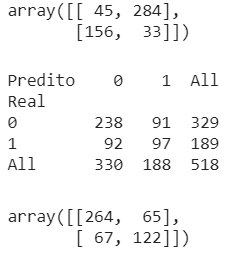





([<matplotlib.axis.XTick at 0x7f3c5fe4f290>,
 [Text(0, 0, 'LDA'), Text(0, 0, 'KNN'), Text(0, 0, 'QDA')])

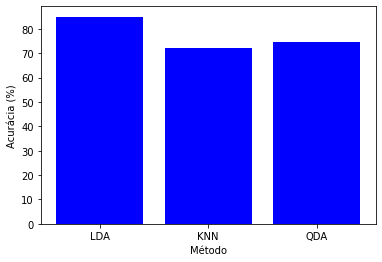

In [ ]:
metodos = ['LDA','KNN','QDA']
plt.bar(range(len(metodos)),desempenhos,color='b')
plt.ylabel('Acurácia (%)')
plt.xlabel('Método')
plt.xticks(range(len(metodos)),metodos)

In [ ]:
def plot_roc2(roc_auc):
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylabel('Taxa de positivos')
    plt.xlabel('Taxa de falsos positivos')

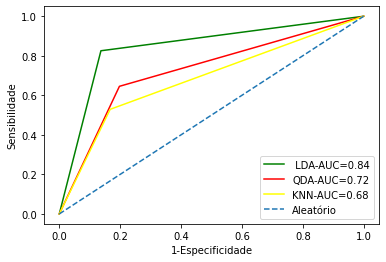

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(dF_y_test, y_pred_lda)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
plt.plot(false_positive_rate, true_positive_rate, color='g', label=' LDA-AUC='+ str(round(roc_auc,2)))
false_positive_rate, true_positive_rate, thresholds = roc_curve(dF_y_test, y_pred_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='red', label='QDA-AUC='+ str(round(roc_auc_qda,2))  )
false_positive_rate, true_positive_rate, thresholds = roc_curve(dF_y_test, resultado)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, color='yellow', label='KNN-AUC='+ str(round(roc_auc_qda,2))  )
plt.plot([0, 1], [0, 1], linestyle='--',label='Aleatório')
plt.ylabel('Sensibilidade')
plt.xlabel('1-Especificidade')
plt.legend()